## Artificial Neural networks

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

## Data Exploration and Preprocessing

In [38]:
data=pd.read_csv(r"C:\Users\karen\Downloads\Alphabets_data.csv")
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [40]:
data.isnull().sum() 

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [41]:
data.shape

(20000, 17)

In [42]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [43]:
data[data.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [44]:
data.drop_duplicates()
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


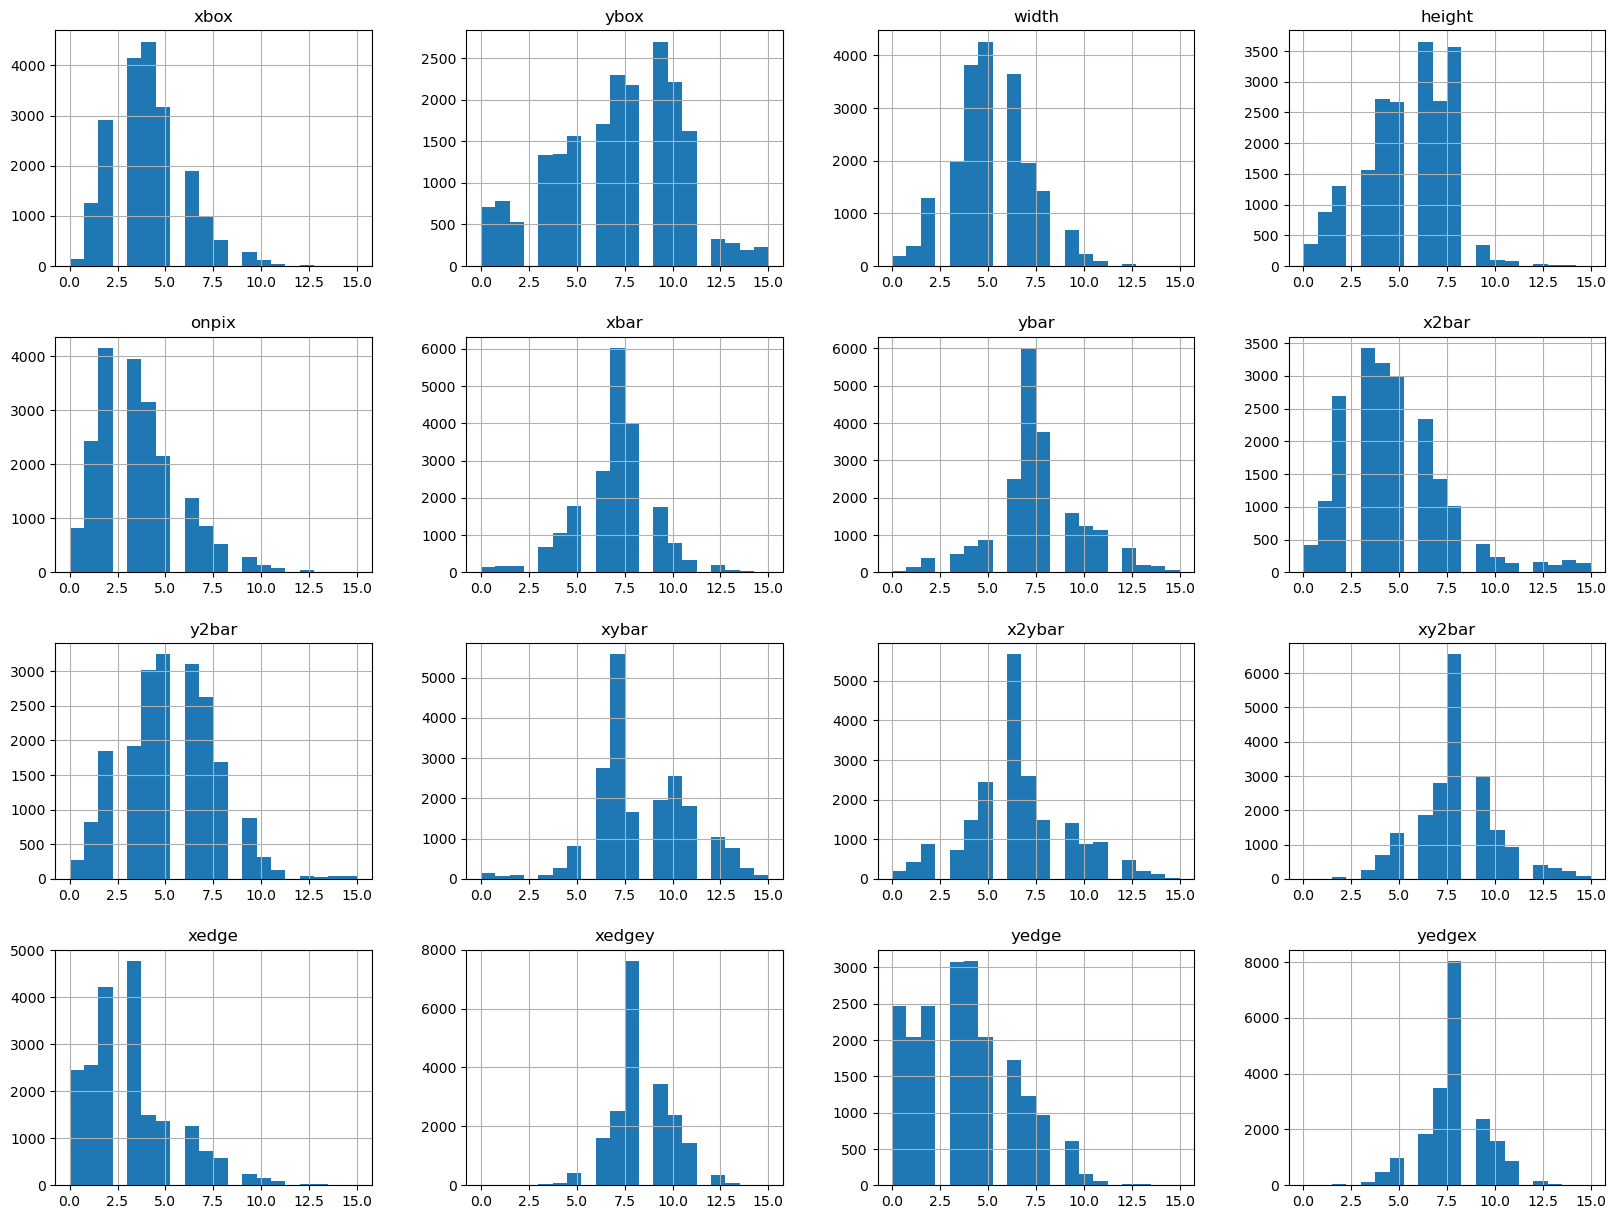

In [45]:
data.hist(bins=20,figsize=(20,15))
plt.show()

<Axes: >

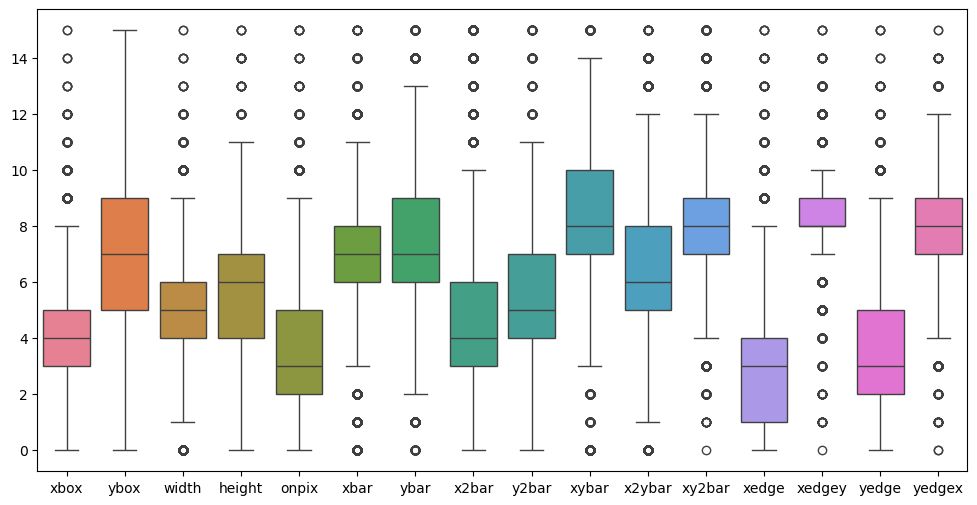

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(data)

In [47]:
for i in data.columns[1:]:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]
data.reset_index(drop=True, inplace=True)
data.shape

(11778, 17)

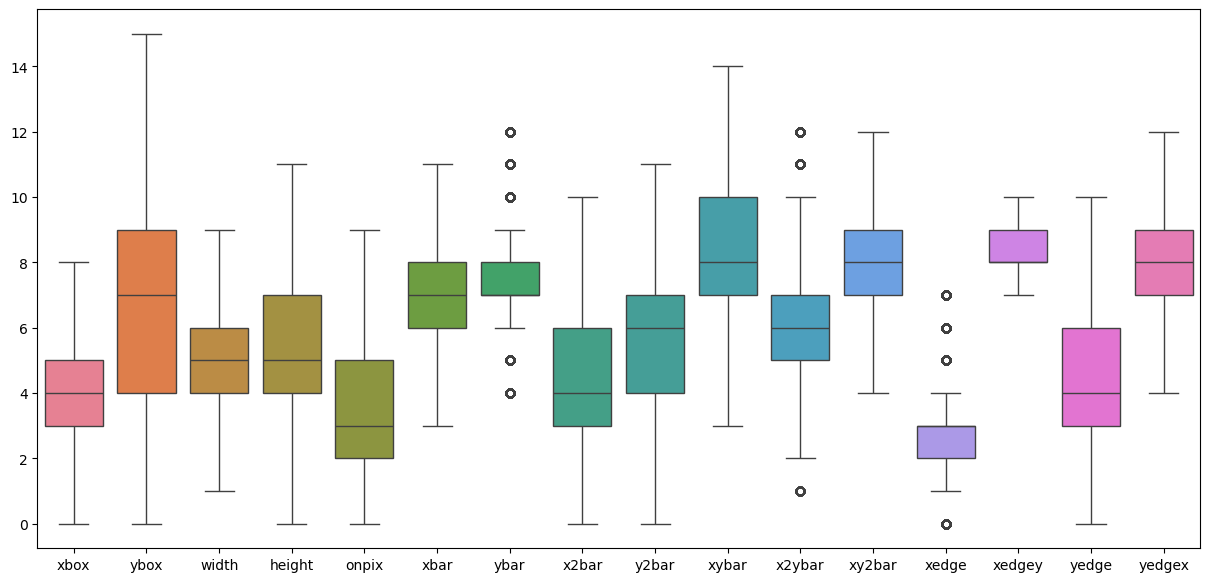

In [48]:
plt.figure(figsize=(15,7))
sns.boxplot(data)
plt.show()

In [49]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [50]:
le=LabelEncoder()

In [51]:
data['letter']=le.fit_transform(data['letter'])

In [52]:
features=data.drop('letter',axis=1)

In [53]:
se=StandardScaler()
se.fit_transform(features)

array([[ 0.74437134,  1.66385166, -1.07757704, ..., -0.37658968,
        -0.10435875,  1.3071168 ],
       [ 0.13183689,  1.35149161,  0.61164688, ..., -1.47611204,
        -0.54745081,  0.66256073],
       [ 1.96944024,  1.35149161,  0.61164688, ...,  1.82245505,
        -0.99054287,  0.01800467],
       ...,
       [-1.09323202, -1.45974885, -1.07757704, ..., -0.37658968,
        -0.54745081, -0.6265514 ],
       [-1.09323202, -1.1473888 , -0.5145024 , ...,  0.72293269,
         0.33873331,  0.01800467],
       [ 0.13183689,  0.72677151,  0.61164688, ..., -1.47611204,
        -0.99054287,  0.01800467]])

In [54]:
target=data['letter']

In [55]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler


## Model Implementation


In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [59]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1,activation='sigmoid')
])

In [60]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [61]:
model.fit(x_train,y_train,validation_split=0.33,epochs=20,batch_size=20)

Epoch 1/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0602 - loss: -30158.3750 - val_accuracy: 0.0608 - val_loss: -125142.4531
Epoch 2/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0602 - loss: -473905.5312 - val_accuracy: 0.0608 - val_loss: -1048916.2500
Epoch 3/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0602 - loss: -2091588.2500 - val_accuracy: 0.0608 - val_loss: -3529636.5000
Epoch 4/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0602 - loss: -5511691.5000 - val_accuracy: 0.0608 - val_loss: -8084876.0000
Epoch 5/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0602 - loss: -11134190.0000 - val_accuracy: 0.0608 - val_loss: -15067768.0000
Epoch 6/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0602 - loss: -19340198.0000 - val_accuracy: 0.0608 - val_loss: -24820316.0000
Epoch 7/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0602 - loss: -30347858.0000 - val_accuracy: 0.0608 - val_loss: -37492004.0000
Epoc

In [62]:
score=model.evaluate(x_train,y_train)

295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0604 - loss: -521426848.0000


In [63]:
score

[-521426848.0, 0.06039057672023773]

## Hyperparameter Tuning

In [64]:
import tensorflow as tf
from kerastuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=16), activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(units=hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [65]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir', project_name='alphabet_tuning')

tuner.search(x_train, y_train, epochs=50, validation_split=0.2)

Trial 5 Complete [00h 01m 09s]
val_accuracy: 0.06047745421528816

Best val_accuracy So Far: 0.06047745421528816
Total elapsed time: 00h 06m 23s


In [66]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units1: {best_hps.get('units1')}, Best units2: {best_hps.get('units2')}, Best learning_rate: {best_hps.get('learning_rate')}")

Best units1: 32, Best units2: 32, Best learning_rate: 0.0001


In [67]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units1: {best_hps.get('units1')}, Best units2: {best_hps.get('units2')}, Best learning_rate: {best_hps.get('learning_rate')}")

Best units1: 32, Best units2: 32, Best learning_rate: 0.0001


In [68]:
best_model = tuner.hypermodel.build(best_hps)

In [69]:
best_model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0494 - loss: 0.0000e+00 - val_accuracy: 0.0605 - val_loss: 0.0000e+00
Epoch 2/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0604 - loss: 0.0000e+00 - val_accuracy: 0.0605 - val_loss: 0.0000e+00
Epoch 3/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0604 - loss: 0.0000e+00 - val_accuracy: 0.0605 - val_loss: 0.0000e+00
Epoch 4/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0604 - loss: 0.0000e+00 - val_accuracy: 0.0605 - val_loss: 0.0000e+00
Epoch 5/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0604 - loss: 0.0000e+00 - val_accuracy: 0.0605 - val_loss: 0.0000e+00
Epoch 6/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0604 - loss: 0.0000e+00 - val_accuracy: 0.0605 - val_loss: 0.0000e+00
Epoch 7/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0604 - loss: 0.0000e+00 - val_accuracy: 0.0605 - val_loss: 0.0000e+00
Epoch 8/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

## Evaluation


In [70]:
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.0509 - loss: 0.0000e+00   
Test Accuracy: 0.05093378573656082


In [71]:
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.0509 - loss: 0.0000e+00   
Test Accuracy: 0.05093378573656082
